### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading train dataset  

In [2]:
data1 = pd.read_csv('blackFriday_train.csv')
data1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
data1.shape

(550068, 12)

### Loading test dataset

In [4]:
data2 = pd.read_csv('blackFriday_test.csv')
data2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
data2.shape

(233599, 11)

### Merging train and test dataset

In [6]:
data = data1.append(data2, sort=False)
data.shape

(783667, 12)

In [7]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


### Describe the basic statistics of the data

In [8]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### Dropping unnecessary fields from the dataset

In [9]:
data.drop(['User_ID'], axis=1, inplace=True)

In [10]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


### Converting categorical data into integer ones by using mapping function

In [11]:
# Unique values of feature Age
data['Gender'].unique()

array(['F', 'M'], dtype=object)

In [12]:
data['Gender']=data['Gender'].map({'F':0, 'M':1})
data['Gender'].head(10)

0    0
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    1
9    1
Name: Gender, dtype: int64

In [13]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


### Visualizing the unique values of the particular filed 

In [14]:
data.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

## OR

In [15]:
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

### Mapping the range variable into integer ones

In [16]:
data['Age']=data['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7})


In [17]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [18]:
data['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

### Creating dummies for the categorical data

In [19]:
city = pd.get_dummies(data['City_Category'], drop_first=True)
city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,0,1


### Concatinating dummy variables with original dataset

In [20]:
data = pd.concat([data,city], axis=1)
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [21]:
data.tail()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
233594,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN,1,0
233595,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN,1,0
233596,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN,0,1
233598,P00316642,0,5,0,B,4+,1,4,5.0,NaN,NaN,1,0


### Checking for columnwise null values

In [22]:
data.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

### Visualizing unique values of fields which contains NaN values for different columns

In [23]:
data.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [24]:
data.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [25]:
data.Purchase.unique()

array([ 8370., 15200.,  1422., ...,   123.,   613.,    nan])

### Value count of each variable

In [26]:
data.Product_Category_2.value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

### Finding mode of the field

In [27]:
data.Product_Category_2.mode()

0    8.0
dtype: float64

### Renaming the columns

In [28]:
data.rename(columns={'Product_Category_2':'cat2', 'Product_Category_3':'cat3'}, inplace=True)


### Looking at the column names after the rename operation

In [29]:
data.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'cat2', 'cat3', 'Purchase', 'B', 'C'],
      dtype='object')

### Filling the NaN values with the mode

In [30]:
data['cat2'] = data['cat2'].fillna(data['cat2'].mode()[0])

In [31]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,8.0,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,8.0,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,8.0,NaN,7969.0,0,1


In [32]:
data.cat2.mode()

0    8.0
dtype: float64

In [33]:
data['cat3'] = data['cat3'].fillna(data['cat3'].mode()[0])

In [34]:
data.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
cat2                               0
cat3                               0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

### Filling the NaN values with the mean of the column

In [35]:
data['Purchase'] = data['Purchase'].fillna(data['Purchase'].mean())


In [36]:
data.Purchase.mean()

9263.96871291369

In [37]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,8.0,16.0,7969.0,0,1


In [38]:
data.tail()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,cat2,cat3,Purchase,B,C
233594,P00118942,0,3,15,B,4+,1,8,8.0,16.0,9263.968713,1,0
233595,P00254642,0,3,15,B,4+,1,5,8.0,16.0,9263.968713,1,0
233596,P00031842,0,3,15,B,4+,1,1,5.0,12.0,9263.968713,1,0
233597,P00124742,0,5,1,C,4+,0,10,16.0,16.0,9263.968713,0,1
233598,P00316642,0,5,0,B,4+,1,4,5.0,16.0,9263.968713,1,0


### Rechecking the null values

In [39]:
data.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
cat2                          0
cat3                          0
Purchase                      0
B                             0
C                             0
dtype: int64

### Dropping the column

In [40]:
data.drop('City_Category', axis=1, inplace=True)

In [41]:
data.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1


In [42]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

### Replacing the value by using str method

In [43]:
data['Stay_In_Current_City_Years']=data.Stay_In_Current_City_Years.str.replace('+','')


In [44]:
data.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


### Checking the info of the dataset

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   cat2                        783667 non-null  float64
 8   cat3                        783667 non-null  float64
 9   Purchase                    783667 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


### Converting the datatypes into integer ones as the datatype for these columns are shown as unsigned int in the info above

In [46]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].astype(int)
data['B'] = data['B'].astype(int)
data['C'] = data['C'].astype(int)


In [47]:
data.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
cat2                          float64
cat3                          float64
Purchase                      float64
B                               int32
C                               int32
dtype: object

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   cat2                        783667 non-null  float64
 8   cat3                        783667 non-null  float64
 9   Purchase                    783667 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


### Creating a checkpoint

In [49]:
copied_data = data.copy()

### Dropping the unnecessary field

In [50]:
copied_data.drop('Product_ID', axis=1, inplace=True)

In [51]:
copied_data.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,cat2,cat3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


### Visualizing Age versus Purchase

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

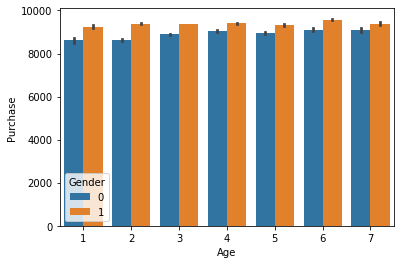

In [52]:
sns.barplot('Age','Purchase', hue='Gender', data=copied_data)

From above bargraph, We can see purchasing of goods of each range of age are almost equal.
And we can conclude that the purchasing goods of men over women is slightly higher.

### Visualizing Occupation Vs Purchase

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

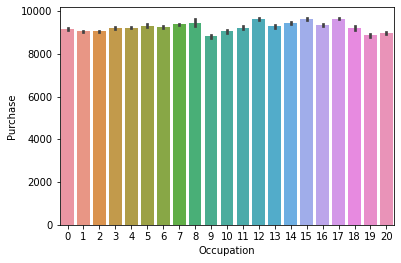

In [53]:
sns.barplot('Occupation', 'Purchase',  data=copied_data)

In [54]:
data['Stay_In_Current_City_Years'].unique()

array([2, 4, 3, 1, 0])

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

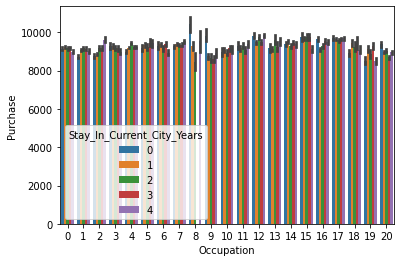

In [55]:
sns.barplot('Occupation', 'Purchase', hue='Stay_In_Current_City_Years', data=copied_data)

All the occupation contributes almost same in purchasing rates and it won't affect alot that how many years you live in a city

### Visualizing Product_Category_1 Vs Purchase

In [58]:
data['Marital_Status'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

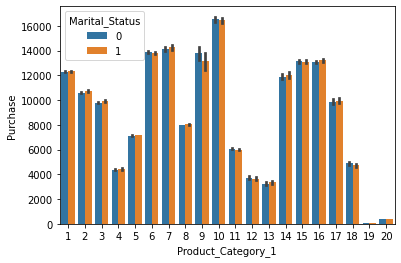

In [57]:
sns.barplot('Product_Category_1', 'Purchase', hue='Marital_Status',data=copied_data)


### Visualizing Product_Category_2 Vs Purchase

<AxesSubplot:xlabel='cat2', ylabel='Purchase'>

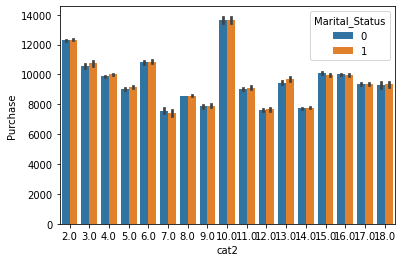

In [59]:
sns.barplot('cat2', 'Purchase', hue='Marital_Status', data=copied_data)


### Visualizing Product_Category_3 Vs Purchase

<AxesSubplot:xlabel='cat3', ylabel='Purchase'>

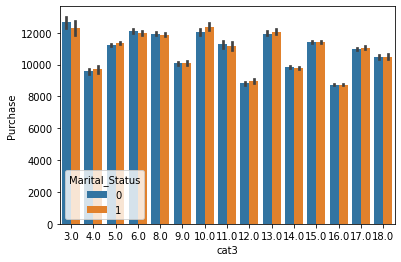

In [60]:
sns.barplot('cat3', 'Purchase', hue='Marital_Status', data=copied_data)


Here, we can conclude that Product Category3 is much more purchased by people than product category2 and product category1. And there is no such variation in percentage of the purchasing whether the person is married or not.

In [63]:
copied_data.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,cat2,cat3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [66]:
copied_data.shape

(783667, 11)

In [72]:
# dropping the Purchase column to create features
X = copied_data.drop('Purchase', axis=1)
# selecting the Purchase column to create labels
y = copied_data.Purchase
print(X.shape)
print(y.shape)

(783667, 10)
(783667,)


### Splitting the dataset into the Training set and Test set

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =5)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(587750, 10)
(587750,)
(195917, 10)
(195917,)


### Feature Scaling so that data in all the columns are to the same scale

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [76]:
X_train

array([[ 0.57275431, -0.36745197,  0.6008837 , ...,  0.36937114,
         1.17365495, -0.67228678],
       [ 0.57275431, -0.36745197, -1.23913919, ...,  0.36937114,
        -0.85203918, -0.67228678],
       [ 0.57275431,  1.10995723, -0.16579251, ...,  0.36937114,
         1.17365495, -0.67228678],
       ...,
       [ 0.57275431,  1.84866184,  1.67423038, ...,  0.36937114,
        -0.85203918,  1.48746045],
       [ 0.57275431, -1.10615657, -0.93246871, ...,  0.36937114,
        -0.85203918, -0.67228678],
       [ 0.57275431, -0.36745197, -1.23913919, ...,  0.36937114,
        -0.85203918,  1.48746045]])

In [77]:
X_test

array([[ 0.57275431, -0.36745197, -0.62579823, ...,  0.36937114,
        -0.85203918, -0.67228678],
       [-1.74594931, -1.10615657, -0.62579823, ...,  0.36937114,
         1.17365495, -0.67228678],
       [ 0.57275431, -1.10615657, -0.62579823, ...,  0.36937114,
        -0.85203918, -0.67228678],
       ...,
       [ 0.57275431, -1.10615657,  0.90755418, ..., -3.64065155,
         1.17365495, -0.67228678],
       [ 0.57275431, -1.10615657,  0.29421322, ...,  0.36937114,
        -0.85203918,  1.48746045],
       [-1.74594931,  1.10995723,  0.6008837 , ...,  0.36937114,
        -0.85203918,  1.48746045]])

Now we have features for both training and testing. The data can now be converted to a dataframe, if necessary, and can be fed to a machine learning model.